<a href="https://colab.research.google.com/github/ronnymunthe99/RemoteSensing/blob/main/(September_Kmeans)Detecting_Upwelling_Area_With_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from glob import glob
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd  'drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
conversion = 272.15
paths = glob(f'./data1/*/*/*/*.nc') #folder netcdf
filenames = [path.split('/')[5][:8] for path in paths]
paths = {k:v for k,v in zip(filenames,paths)}
paths

{'20021225': './data1/mw_ir_oi/2002/359/20021225120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021230': './data1/mw_ir_oi/2002/364/20021230120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021228': './data1/mw_ir_oi/2002/362/20021228120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021226': './data1/mw_ir_oi/2002/360/20021226120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021229': './data1/mw_ir_oi/2002/363/20021229120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021219': './data1/mw_ir_oi/2002/353/20021219120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021231': './data1/mw_ir_oi/2002/365/20021231120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021227': './data1/mw_ir_oi/2002/361/20021227120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021221': './data1/mw_ir_oi/2002/355/20021221120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021224

In [ ]:
from datetime import timedelta, date
nama = 'September'
start_month = date(2020, 9, 1)
end_month = date(2020, 9, 30)
datee = pd.date_range(start_month,end_month).astype(str).str.replace('-','')
dates = datee
for n_date in range(1,19):
  start_month= date(start_month.year-1,start_month.month,start_month.day)
  end_month= date(end_month.year-1,end_month.month,end_month.day)
  datee = pd.date_range(start_month,end_month).astype(str).str.replace('-','')
  dates= dates.append(datee)
print(dates)

Index(['20200901', '20200902', '20200903', '20200904', '20200905', '20200906',
       '20200907', '20200908', '20200909', '20200910',
       ...
       '20020921', '20020922', '20020923', '20020924', '20020925', '20020926',
       '20020927', '20020928', '20020929', '20020930'],
      dtype='object', length=570)


In [ ]:
gambars = []
for date in dates:
    data = nc.Dataset(paths[date])
    lon = np.array(data['lon'][:])
    lat = np.array(data['lat'][:])
    gambar = np.array(data['analysed_sst'][:])[0][np.where((lat>-10)&(lat<10))][:,np.where((lon>91)&(lon<145))][:,0,:] #molluccas sea coordinate
    gambar = gambar-conversion
    gambar = cv2.flip(gambar,0)
    gambars.append(gambar)
gambars = np.array(gambars)
gambars = np.mean(gambars,axis=0)

In [ ]:
ayam = gambars.astype(float)
ayam[gambars<0] = np.nan
# ayam = np.isnan(gambars).sum()

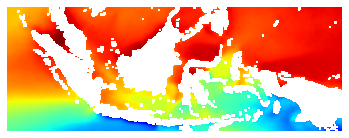

In [ ]:
plt.imshow(ayam,  extent=[91, 145,-10, 10 ],cmap='jet')
plt.axis('off')
huhu = "./data1/Hasil image/"
plt.savefig(huhu + '%s' %nama, bbox_inches='tight')

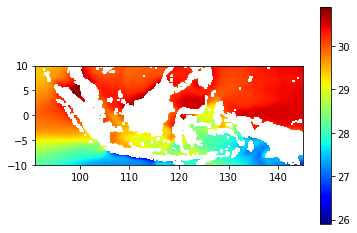

In [ ]:
pap = plt.imshow(ayam,  extent=(91, 145,-10, 10 ),cmap='jet')
plt.colorbar(pap)
plt.axis('on')
sblm = "./data1/Hasil image/Sblm/Kmeans/september"
plt.savefig(sblm + '%s' %nama, bbox_inches='tight')

In [ ]:
original_image = cv2.imread('data1//Hasil image/September.png')
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

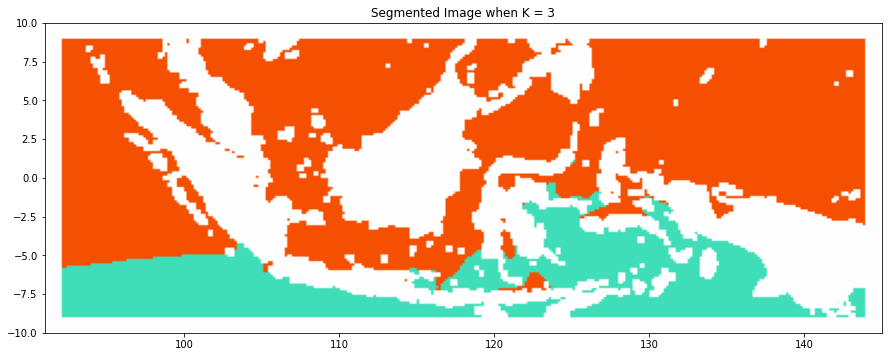

In [ ]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

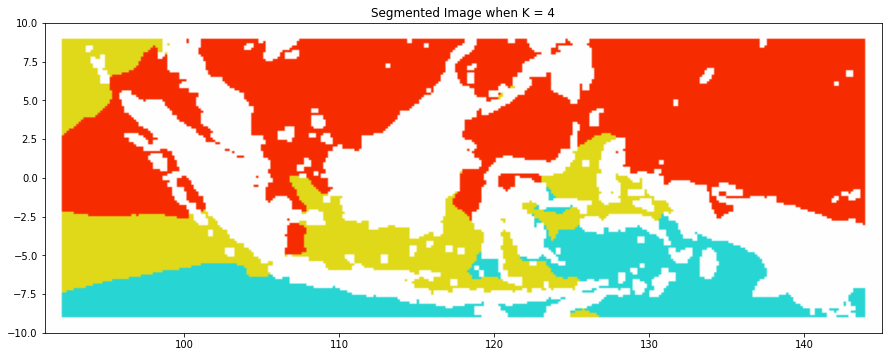

In [ ]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

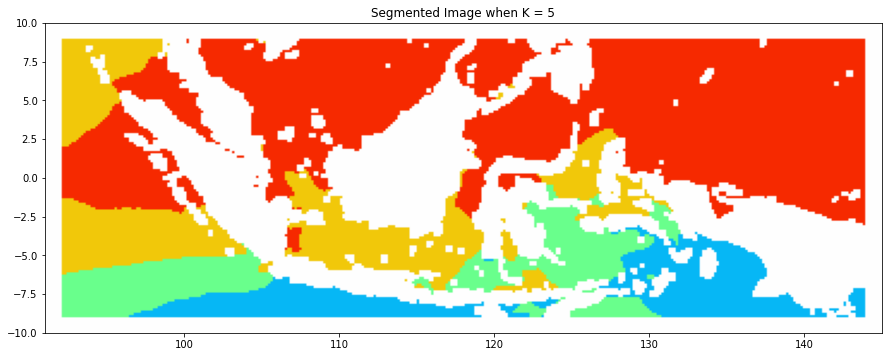

In [ ]:
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

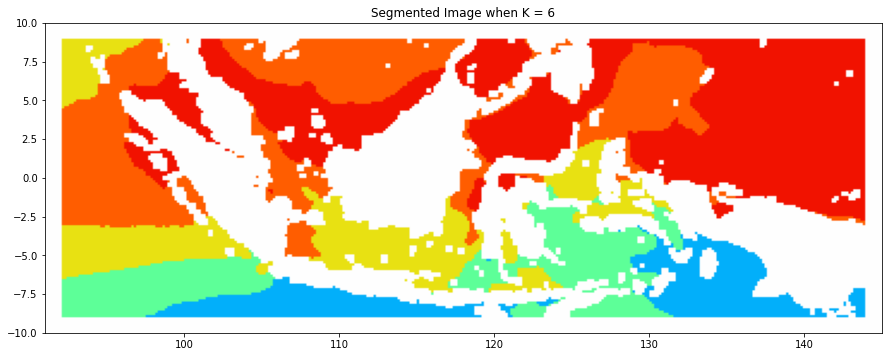

In [ ]:
K = 6
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

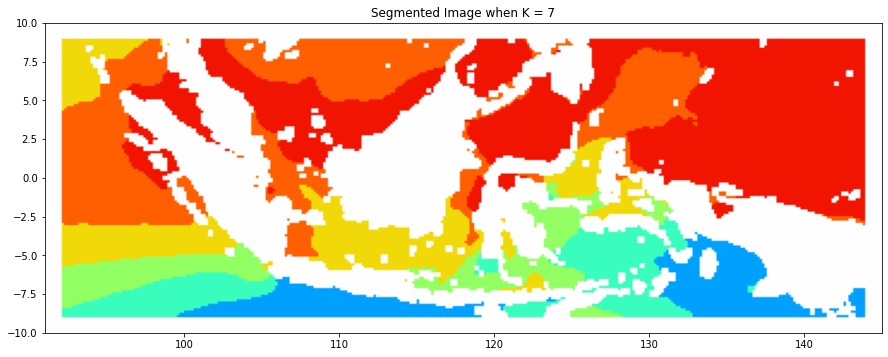

In [ ]:
K = 7
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

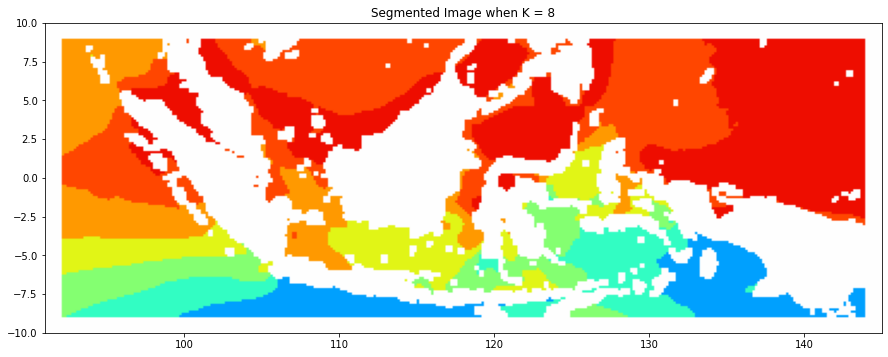

In [ ]:
K = 8
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

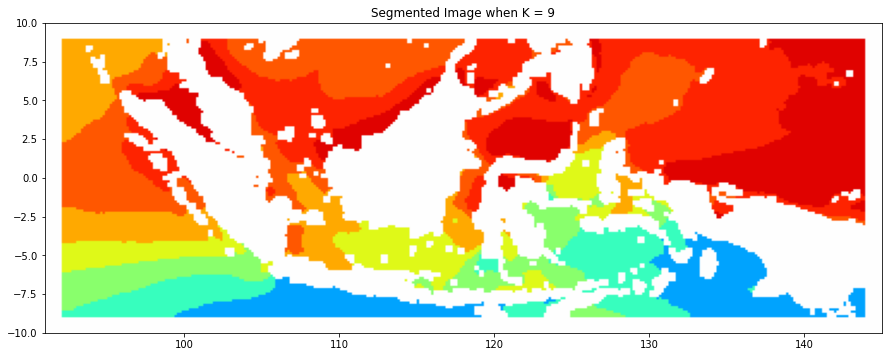

In [ ]:
K = 9
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

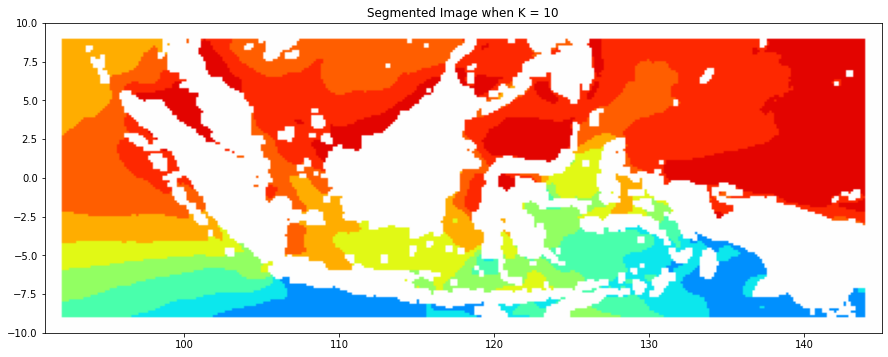

In [ ]:
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15,7))
plt.imshow(result_image, extent=(91, 145,-10, 10 ))
plt.title('Segmented Image when K = %i' % K)
plt.axis('on')
path = "./data1/Hasil image/Kmeans/September"
plt.savefig(path + '%s'%nama +' untuk k-%i' % K, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = range(3,11)

for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(vectorized)
    # The silhouette_score gives the
    # average value for all the samples.
    silhouette_avg = silhouette_score(vectorized, cluster_labels)
    print("For no of clusters =", n_clusters," The average silhouette_score is :", silhouette_avg)

For no of clusters = 3  The average silhouette_score is : 0.79060286
For no of clusters = 4  The average silhouette_score is : 0.7880944
For no of clusters = 5  The average silhouette_score is : 0.7854015
For no of clusters = 6  The average silhouette_score is : 0.73987997
For no of clusters = 7  The average silhouette_score is : 0.7401678
For no of clusters = 8  The average silhouette_score is : 0.7378577
For no of clusters = 9  The average silhouette_score is : 0.7368535
For no of clusters = 10  The average silhouette_score is : 0.7291202
